## Import Data

In [34]:
import pandas as pd

In [35]:
company_df = pd.read_csv("company_train.csv")

In [36]:
company_df.shape

(79853, 13)

In [37]:
company_df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


The 'target' column is not present in the test dataset. It is this column which I have to predict using my model. Also, the 'Premium' column too is absent in the test dataset. So I'll try dropping it from the train data as well, and see what result I get without it:

In [38]:
company_df=company_df.drop('premium',axis=1)

In [39]:
company_df.target.value_counts()

1    74855
0     4998
Name: target, dtype: int64

here we go again the dataset has imbalaned classification and it is hard to use. Bz it is likely to over_fit. I won't prove overfit in this notebook

In [40]:
company_df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [41]:
# First check there is duplications
company_df.duplicated().sum()

0

In [42]:
# Firstly, checking the missing values in the whole train dataset using 'isnull' function:
company_df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [43]:
# So, filling 0 as missing values using 'fillna' function in all 3 'Count' columns:
company_df['Count_3-6_months_late'].fillna(0,inplace=True)
company_df['Count_6-12_months_late'].fillna(0,inplace=True)
company_df['Count_more_than_12_months_late'].fillna(0,inplace=True)

In [44]:
# Filling up missing values in 'application_underwriting_score column' with the mean of this column:
company_df['application_underwriting_score'].fillna(company_df['application_underwriting_score'].mean(),inplace=True)

In [45]:
# Verifying if all missing values got filled up or not:
company_df.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

## Visualize Data

/tmp/ipykernel_296141/2871364494.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



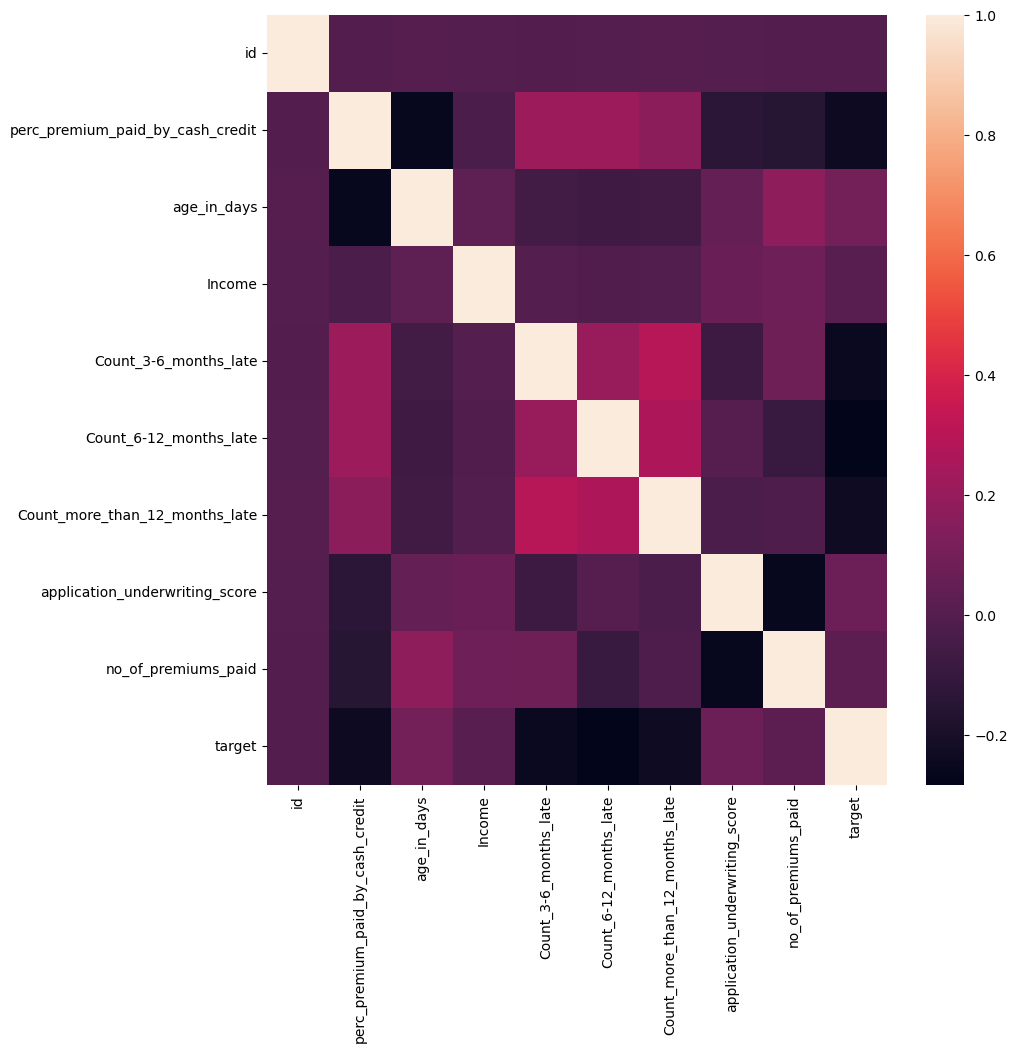

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
# Also importing 'seaborn' library to better visualize the distributions:
import seaborn as sns

plt.figure(figsize=(10,10))
dataplot=sns.heatmap(company_df.corr())
plt.show()

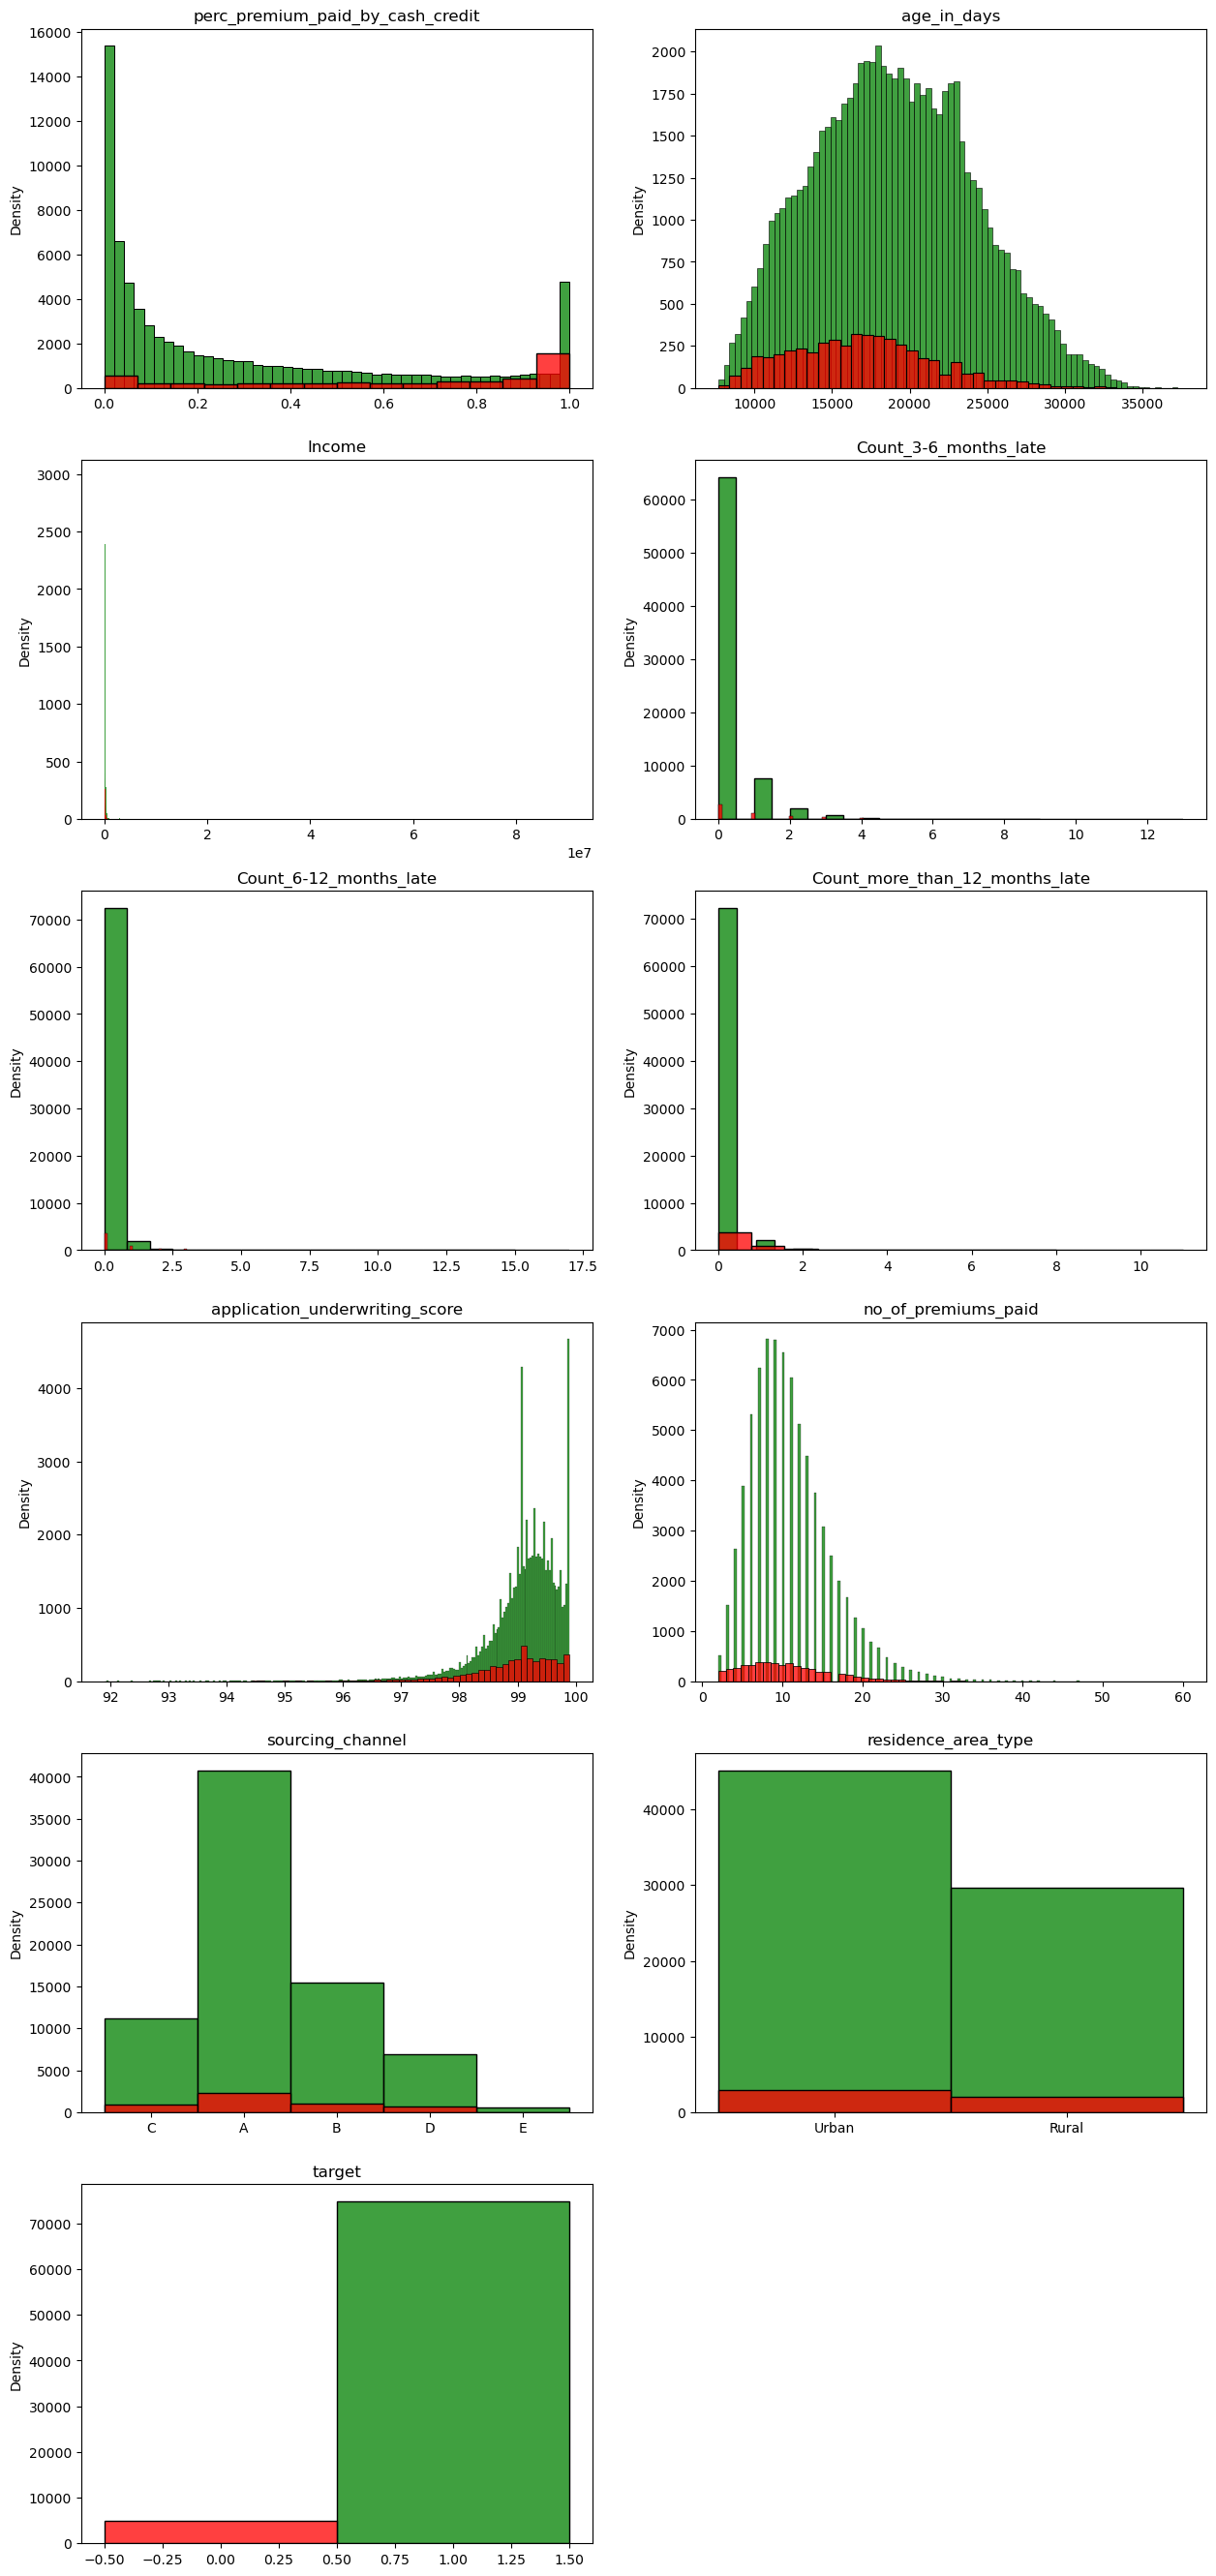

In [47]:
import matplotlib.gridspec as gridspec
#Looking the V's features
columns = company_df.iloc[:,1:30].columns

premeium = company_df.target == 1
non_pay = company_df.target == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(company_df[columns]):
    ax = plt.subplot(grid[n])
    sns.histplot(company_df[col][premeium],  color='g') #Will receive the "semi-salmon" violin
    sns.histplot(company_df[col][non_pay], color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [48]:
import plotly.figure_factory as ff
from plotly.offline import iplot

class_0 = company_df.loc[company_df['target'] == 0]["age_in_days"]
class_1 = company_df.loc[company_df['target'] == 1]["age_in_days"]

hist_data = [class_0, class_1]
group_labels = ['Non pay', 'Premium']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

## Prepare Data

In [49]:
company_df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


There are non float data in dataset so change to int or float by one hot encodeing

In [50]:
company_df.sourcing_channel.value_counts()

A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

In [51]:
company_df.residence_area_type.value_counts()

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

In [52]:
# Define the columns to encode
columns_to_encode = ['sourcing_channel', 'residence_area_type']

In [53]:
from sklearn.preprocessing import LabelEncoder


# Create the OneHotEncoder object
encoder = LabelEncoder()

# Fit and transform the 'color' column
encoded_sourcing_channel = encoder.fit_transform(company_df['sourcing_channel'])

# Replace the 'color' column with the encoded values
company_df["sourcing_channel"] = encoded_sourcing_channel

company_df

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,0,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,0,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,1,Urban,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,0,Rural,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,0,Rural,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,0,Rural,1


In [54]:
# Fit and transform the 'color' column
encoded_sourcing_channel = encoder.fit_transform(company_df['residence_area_type'])

# Replace the 'color' column with the encoded values
company_df["residence_area_type"] = encoded_sourcing_channel

company_df

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,1,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,0,1,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,0,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,0,1,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,1,1,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,0,0,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,0,0,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,0,0,1


In [55]:
company_df.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                      int64
residence_area_type                   int64
target                                int64
dtype: object

Because of imbalnce dataset I try to use over sampling by SMOTE

In [56]:
label = company_df['target']
features = company_df.drop('target', axis=1)


In [57]:
features.shape, label.shape

((79853, 11), (79853,))

In [58]:
features.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,0,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,0,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,1


In [59]:
features.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                      int64
residence_area_type                   int64
dtype: object

In [60]:
label.head()

0    1
1    1
2    0
3    1
4    1
Name: target, dtype: int64

In [61]:
def check_skewness(x):
    # this can check relation between each column
    skew_limit=0.75
    skew_value=company_df[x.columns].skew()
    #print(skew_value)
    skew_col=skew_value[abs(skew_value)>skew_limit]
    cols=skew_col.index
    return cols

In [62]:
skewed_col_sm = check_skewness(features)
print(f"SMOTE col : \n {skewed_col_sm}" )

SMOTE col : 
 Index(['perc_premium_paid_by_cash_credit', 'Income', 'Count_3-6_months_late',
       'Count_6-12_months_late', 'Count_more_than_12_months_late',
       'application_underwriting_score', 'no_of_premiums_paid',
       'sourcing_channel'],
      dtype='object')


In [63]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(standardize=False)
features[skewed_col_sm]=pt.fit_transform(features[skewed_col_sm])

/home/hanlinn/miniconda3/envs/main/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning:

overflow encountered in multiply



In [64]:
### Note that you can fit_transform the whole oversampled features(train+test) from begining
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_sm_feature=sc.fit_transform(features)
scaled_sm_feature

array([[ 1.63288345,  0.72802841, -1.30334142, ...,  0.56864615,
         1.23290906,  0.81073162],
       [-0.47603264, -1.15004986,  0.51823105, ...,  1.70534182,
        -0.89807845,  0.81073162],
       [-0.78554927,  1.49744583, -0.25259668, ..., -0.71756401,
         1.23290906, -1.2334538 ],
       ...,
       [ 0.60381354, -1.22842424,  0.86879928, ...,  0.3908572 ,
        -0.89807845, -1.2334538 ],
       [ 0.30544219,  0.64763599,  0.7284568 , ..., -0.45741118,
        -0.89807845, -1.2334538 ],
       [ 0.43620932,  0.99373224, -0.60239696, ..., -0.45741118,
        -0.89807845,  0.81073162]])

In [65]:
scaled_sm_feature.shape, label.shape

((79853, 11), (79853,))

## Train and Evaluate

Train test split

In [66]:
from sklearn.model_selection import train_test_split

print("Splitting SMOTE : ")
train_sm_features, \
test_sm_features, \
train_sm_labels, \
test_sm_labels=train_test_split(scaled_sm_feature,label,test_size=0.2,random_state=1)
print(train_sm_features.shape, train_sm_labels.shape, test_sm_features.shape, test_sm_labels.shape)


Splitting SMOTE : 
(63882, 11) (63882,) (15971, 11) (15971,)


### Model building

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb

In [68]:
#Building Model Dict
Models = {
    "Logistic Regression": LogisticRegression(n_jobs=-1),                    #
    "Support Vector Classifier": SVC(),                             # Ridge, SVC, LinearSVC, Passive_AC
    "Decision Tree": DecisionTreeClassifier(max_depth=6),           #
    "KNearest": KNeighborsClassifier(n_neighbors=5,n_jobs=-1),                # doesn't have model.predict_proba so I left out.
    "GaussianNB" : GaussianNB(),                                    #
    "LDA" : LinearDiscriminantAnalysis(),                           # 
    "Ridge" : RidgeClassifier(),                                    #  
    "QDA" : QuadraticDiscriminantAnalysis(),                        #
    "Bagging" : BaggingClassifier(),                                #
    "MLP" : MLPClassifier(),                                        #
    "LSVC" : LinearSVC(),                                           #  
    "BernoulliNB" : BernoulliNB(),                                  #  
    "Passive_AC" : PassiveAggressiveClassifier(),                   # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  
    "SGB"     : GradientBoostingClassifier(n_estimators=100, random_state=9),
    "Adaboost" : AdaBoostClassifier(n_estimators=100, random_state=9, algorithm='SAMME.R', learning_rate=0.8),
    "Extra_T" : ExtraTreesClassifier(n_estimators=100, max_features=3),
    "R_forest" : RandomForestClassifier(max_samples=0.9, n_estimators=100, max_features=3),
    "XGB" : xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)}

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix

def calculate_score(classifier, test_features=test_sm_features, test_labels=test_sm_labels):

    predictions   = classifier.predict(test_features)
    base_score   = classifier.score(test_features,test_labels)
    accuracy     = accuracy_score(test_labels, predictions)
    acc_bal      = balanced_accuracy_score(test_labels, predictions)
    av_precision = average_precision_score(test_labels, predictions)
    recall       = recall_score(test_labels, predictions)#Set df_used to the fraudulent transactions' dataset.
    f1           = f1_score(test_labels, predictions)
    mcc          = matthews_corrcoef(test_labels, predictions)
    score = {
        "base_score"     : round(base_score,3),
        "accuary"        : round(accuracy,3),
        "acc_bal"        : round(acc_bal,3),
        "av_precision"   : round(av_precision,3),
        "recall"         : round(recall,3),
        "f1"             : round(f1,3),
        "mcc"            : round(mcc,3)   }
    

    conf_matrix = confusion_matrix(test_labels, predictions)
    sns.heatmap(conf_matrix, annot = True, fmt='g')
    plt.show()
    return score

In [70]:
# for short in time,and resources, NearMiss undersampling data is taken
def train_dataset():
    i = 1
    Model_scores = {} #Model = Socre
    for Model_Name, classifier in Models.items():
        print(f"{i}. {Model_Name}")
        classifier.fit(train_sm_features, train_sm_labels)
        score = calculate_score(classifier=classifier)
        i = i+1
        print(f"{score}")
        print("________________________________________")
        Model_scores[Model_Name] = score
    return Model_scores

1. Logistic Regression


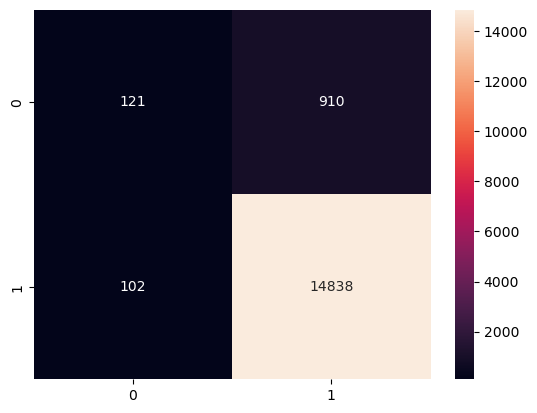

{'base_score': 0.937, 'accuary': 0.937, 'acc_bal': 0.555, 'av_precision': 0.942, 'recall': 0.993, 'f1': 0.967, 'mcc': 0.231}
________________________________________
2. Support Vector Classifier


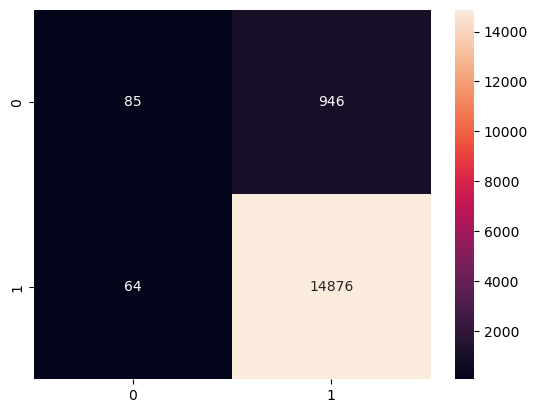

{'base_score': 0.937, 'accuary': 0.937, 'acc_bal': 0.539, 'av_precision': 0.94, 'recall': 0.996, 'f1': 0.967, 'mcc': 0.2}
________________________________________
3. Decision Tree


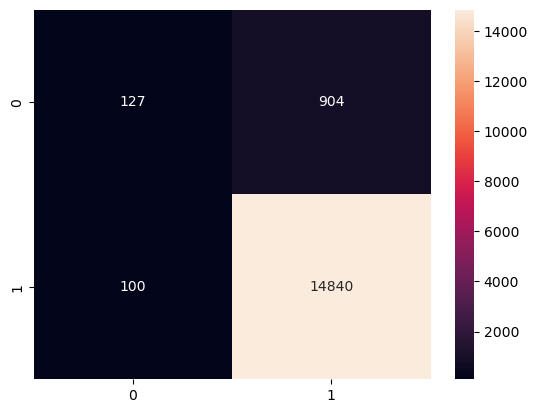

{'base_score': 0.937, 'accuary': 0.937, 'acc_bal': 0.558, 'av_precision': 0.943, 'recall': 0.993, 'f1': 0.967, 'mcc': 0.242}
________________________________________
4. KNearest


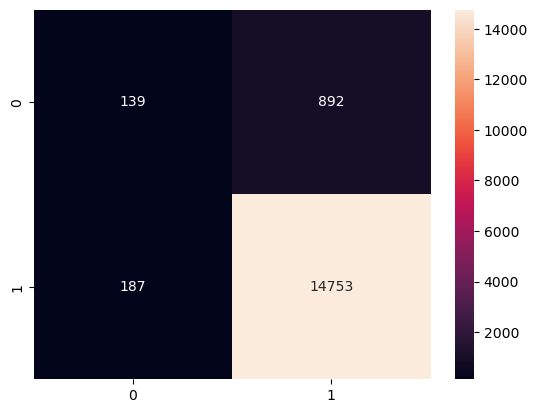

{'base_score': 0.932, 'accuary': 0.932, 'acc_bal': 0.561, 'av_precision': 0.943, 'recall': 0.987, 'f1': 0.965, 'mcc': 0.213}
________________________________________
5. GaussianNB


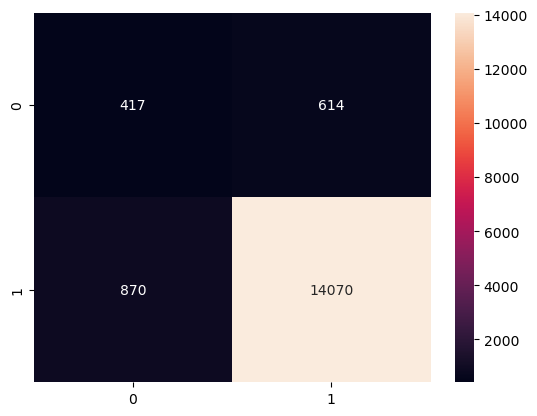

{'base_score': 0.907, 'accuary': 0.907, 'acc_bal': 0.673, 'av_precision': 0.957, 'recall': 0.942, 'f1': 0.95, 'mcc': 0.313}
________________________________________
6. LDA


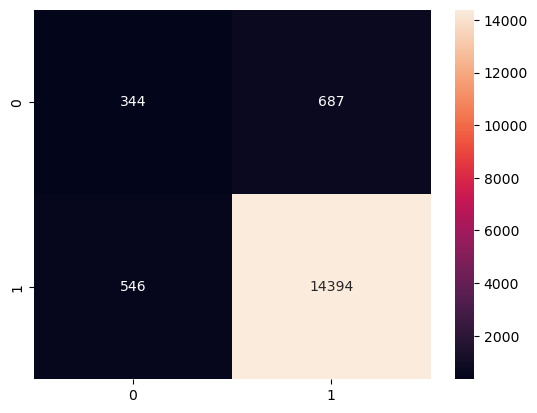

{'base_score': 0.923, 'accuary': 0.923, 'acc_bal': 0.649, 'av_precision': 0.954, 'recall': 0.963, 'f1': 0.959, 'mcc': 0.318}
________________________________________
7. Ridge


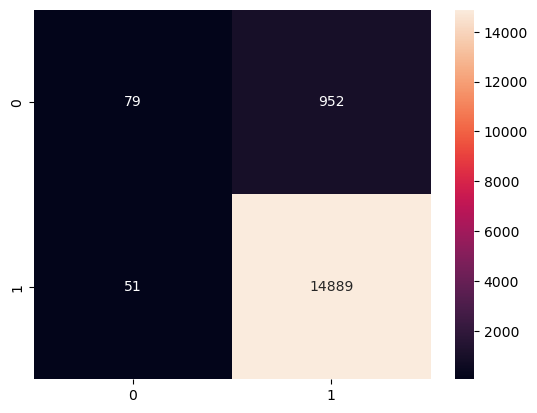

{'base_score': 0.937, 'accuary': 0.937, 'acc_bal': 0.537, 'av_precision': 0.94, 'recall': 0.997, 'f1': 0.967, 'mcc': 0.2}
________________________________________
8. QDA


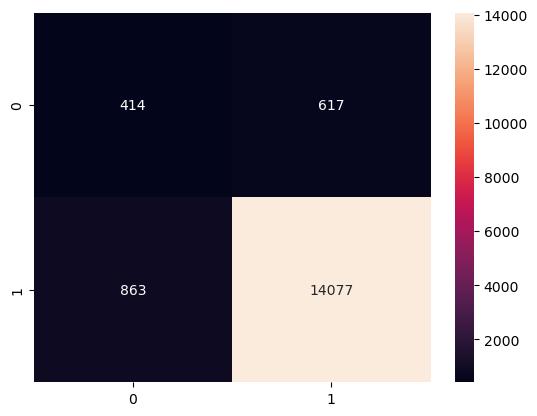

{'base_score': 0.907, 'accuary': 0.907, 'acc_bal': 0.672, 'av_precision': 0.957, 'recall': 0.942, 'f1': 0.95, 'mcc': 0.311}
________________________________________
9. Bagging


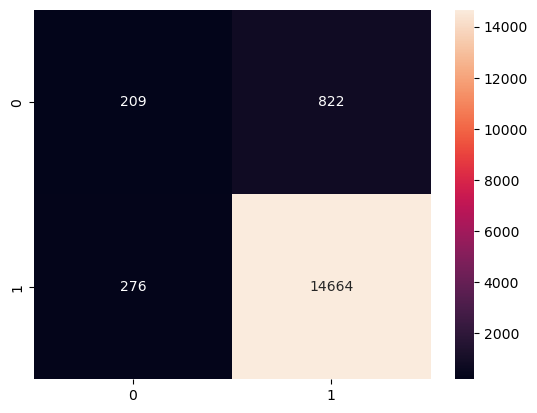

{'base_score': 0.931, 'accuary': 0.931, 'acc_bal': 0.592, 'av_precision': 0.947, 'recall': 0.982, 'f1': 0.964, 'mcc': 0.264}
________________________________________
10. MLP


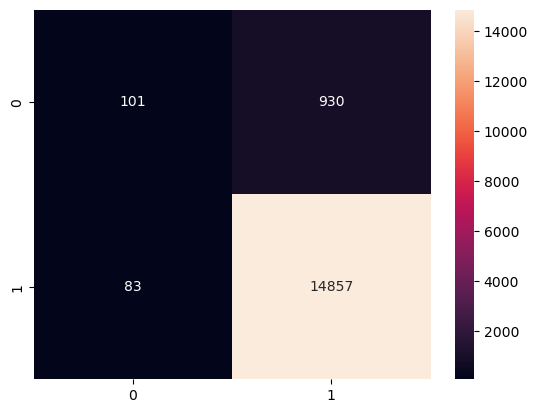

{'base_score': 0.937, 'accuary': 0.937, 'acc_bal': 0.546, 'av_precision': 0.941, 'recall': 0.994, 'f1': 0.967, 'mcc': 0.213}
________________________________________
11. LSVC


/home/hanlinn/miniconda3/envs/main/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



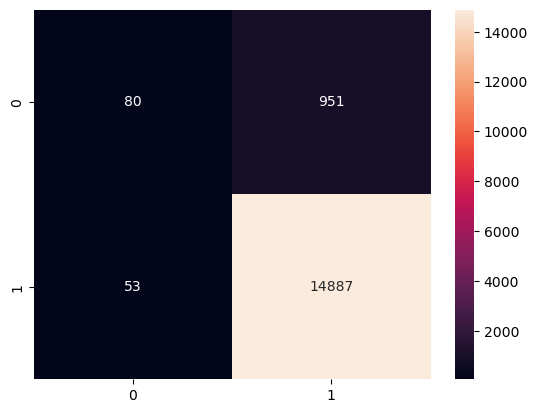

{'base_score': 0.937, 'accuary': 0.937, 'acc_bal': 0.537, 'av_precision': 0.94, 'recall': 0.996, 'f1': 0.967, 'mcc': 0.2}
________________________________________
12. BernoulliNB


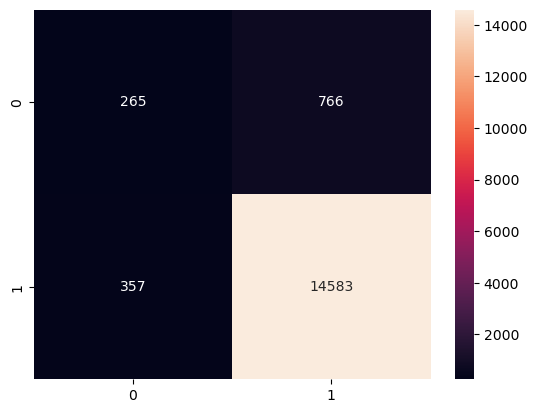

{'base_score': 0.93, 'accuary': 0.93, 'acc_bal': 0.617, 'av_precision': 0.95, 'recall': 0.976, 'f1': 0.963, 'mcc': 0.296}
________________________________________
13. Passive_AC


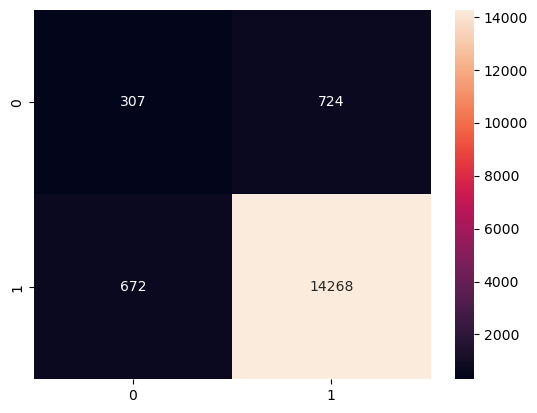

{'base_score': 0.913, 'accuary': 0.913, 'acc_bal': 0.626, 'av_precision': 0.951, 'recall': 0.955, 'f1': 0.953, 'mcc': 0.259}
________________________________________
14. SGB


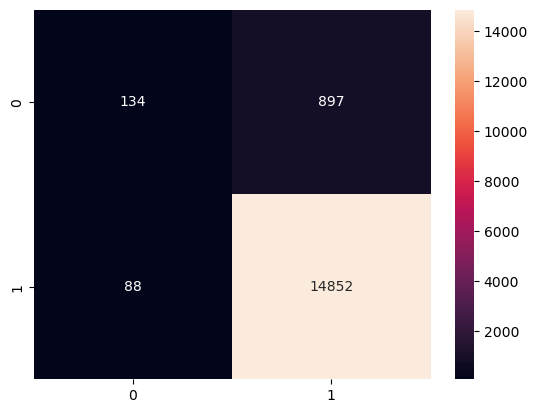

{'base_score': 0.938, 'accuary': 0.938, 'acc_bal': 0.562, 'av_precision': 0.943, 'recall': 0.994, 'f1': 0.968, 'mcc': 0.26}
________________________________________
15. Adaboost


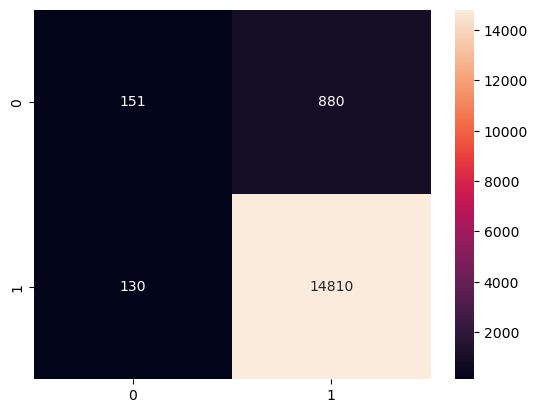

{'base_score': 0.937, 'accuary': 0.937, 'acc_bal': 0.569, 'av_precision': 0.944, 'recall': 0.991, 'f1': 0.967, 'mcc': 0.257}
________________________________________
16. Extra_T


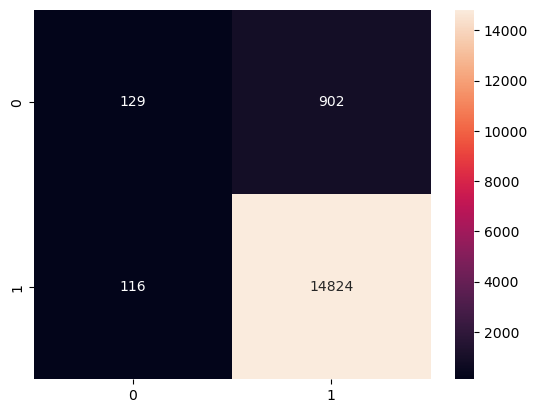

{'base_score': 0.936, 'accuary': 0.936, 'acc_bal': 0.559, 'av_precision': 0.943, 'recall': 0.992, 'f1': 0.967, 'mcc': 0.235}
________________________________________
17. R_forest


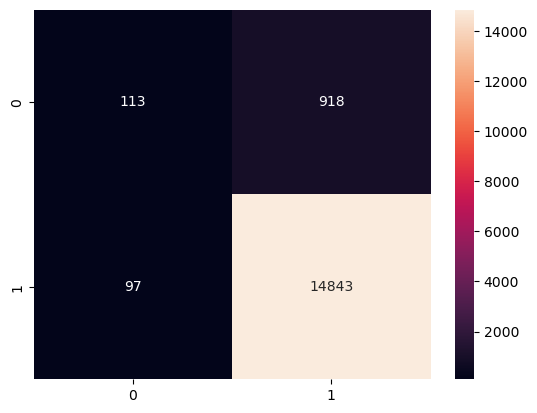

{'base_score': 0.936, 'accuary': 0.936, 'acc_bal': 0.552, 'av_precision': 0.942, 'recall': 0.994, 'f1': 0.967, 'mcc': 0.222}
________________________________________
18. XGB


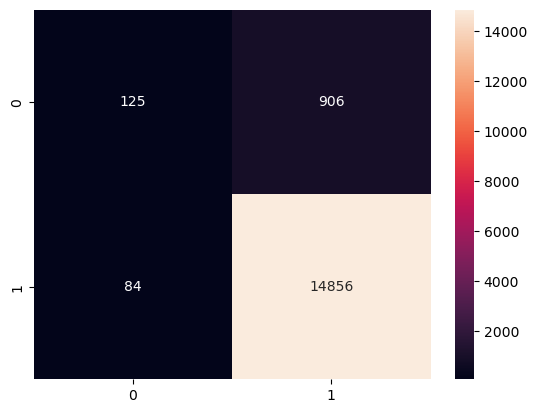

{'base_score': 0.938, 'accuary': 0.938, 'acc_bal': 0.558, 'av_precision': 0.942, 'recall': 0.994, 'f1': 0.968, 'mcc': 0.25}
________________________________________


In [71]:
nm_Model_score = train_dataset()

In [72]:
# lgb
import lightgbm as lgb

params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }


lgb_train = lgb.Dataset(train_sm_features, train_sm_labels,  params={'verbose': -1})
lgb_test = lgb.Dataset(train_sm_features, train_sm_labels,  params={'verbose': -1}, reference=lgb_train)

LGBM = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_test], verbose_eval=False)
LGBM_pred=LGBM.predict(test_sm_features)
LGBM_pred = LGBM_pred.round()

LGBM_f1_score = f1_score(y_true=test_sm_labels,
                      y_pred=LGBM_pred)
LGBM_f1_score

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


/home/hanlinn/miniconda3/envs/main/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



0.966646177736081

<Axes: >

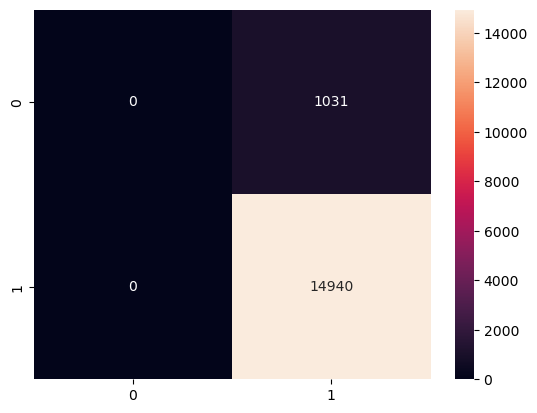

In [73]:
conf_matrix = confusion_matrix(test_sm_labels, LGBM_pred)
sns.heatmap(conf_matrix, annot = True, fmt='g')

In [74]:
from catboost import Pool, CatBoostClassifier, cv

Catboost=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42,)
Catboost.fit(train_sm_features,train_sm_labels,eval_set=(test_sm_features,test_sm_labels))

cat_pred = Catboost.predict(test_sm_features)
cat_F1_score = f1_score(y_true = test_sm_labels,
                  y_pred = cat_pred)
cat_F1_score

Learning rate set to 0.088478
0:	learn: 0.9379011	test: 0.9354455	best: 0.9354455 (0)	total: 56.5ms	remaining: 56.4s
1:	learn: 0.9379011	test: 0.9354455	best: 0.9354455 (0)	total: 61.6ms	remaining: 30.7s
2:	learn: 0.9384803	test: 0.9363847	best: 0.9363847 (2)	total: 67.6ms	remaining: 22.5s
3:	learn: 0.9386525	test: 0.9367604	best: 0.9367604 (3)	total: 72.5ms	remaining: 18.1s
4:	learn: 0.9385586	test: 0.9366978	best: 0.9367604 (3)	total: 78.2ms	remaining: 15.6s
5:	learn: 0.9387934	test: 0.9371987	best: 0.9371987 (5)	total: 83.5ms	remaining: 13.8s
6:	learn: 0.9389499	test: 0.9371987	best: 0.9371987 (5)	total: 89.9ms	remaining: 12.8s
7:	learn: 0.9388873	test: 0.9370108	best: 0.9371987 (5)	total: 96.3ms	remaining: 11.9s
8:	learn: 0.9391221	test: 0.9371987	best: 0.9371987 (5)	total: 103ms	remaining: 11.3s
9:	learn: 0.9391534	test: 0.9371987	best: 0.9371987 (5)	total: 110ms	remaining: 10.9s
10:	learn: 0.9392161	test: 0.9371361	best: 0.9371987 (5)	total: 117ms	remaining: 10.5s
11:	learn: 0.93

0.9676413255360624

<Axes: >

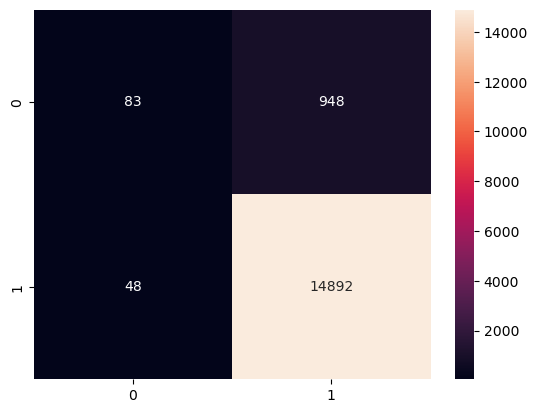

In [75]:
conf_matrix = confusion_matrix(test_sm_labels, cat_pred)
sns.heatmap(conf_matrix, annot = True, fmt='g')

In [76]:
from sklearn.ensemble import StackingClassifier

base_models=[('RF',RandomForestClassifier(max_samples=0.9,n_jobs=-1)),('knn',KNeighborsClassifier(n_neighbors=5,n_jobs=-1)),('DT',DecisionTreeClassifier(max_depth=6))]
meta_model = LogisticRegression(n_jobs=-1)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True, cv=3,n_jobs=-1)

In [77]:
stacking_model.fit(train_sm_features,train_sm_labels)
acc=stacking_model.score(test_sm_features,test_sm_labels)

<Axes: >

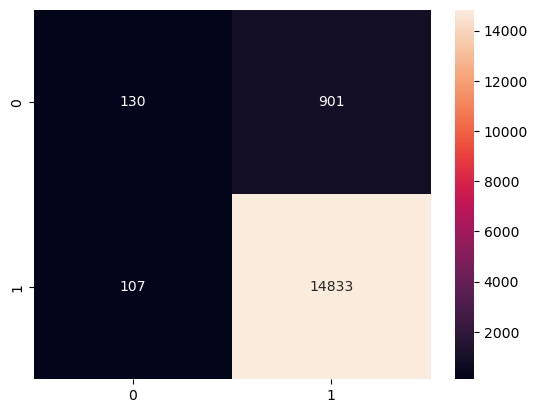

In [78]:
from sklearn.metrics import confusion_matrix
y_pred = stacking_model.predict(test_sm_features)
conf_matrix = confusion_matrix(test_sm_labels, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt='g')

In [79]:
stack_f1_score = f1_score(y_true=test_sm_labels,
                          y_pred=y_pred)
stack_f1_score

0.9671382930168874

In [80]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

n_inputs = features.shape[1]
print(n_inputs)

tf.set_seed = 42

base_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

base_model.summary()

base_model.compile(
    optimizer = Adam(learning_rate= 0.0001),
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

2023-04-17 17:18:52.805051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11


2023-04-17 17:18:54.025469: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 17:18:54.026484: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 32)                384       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,693
Trainable params: 2,693
Non-trainable params: 0
_________________________________________________________________


In [81]:
train_sm_features = tf.constant(train_sm_features)
train_sm_labels = tf.constant(train_sm_labels)
test_sm_features = tf.constant(test_sm_features)
test_sm_labels = tf.constant(test_sm_labels)

In [82]:
tf.set_seed = 42
ANN_history = base_model.fit(train_sm_features,
                             train_sm_labels,
                             batch_size= 25,
                             epochs=20,
                             validation_data=(test_sm_features,test_sm_labels))

Epoch 1/20
2556/2556 [==============================] - 15s 6ms/step - loss: 0.2555 - accuracy: 0.9365 - val_loss: 0.2045 - val_accuracy: 0.9354
Epoch 2/20
2556/2556 [==============================] - 13s 5ms/step - loss: 0.1940 - accuracy: 0.9384 - val_loss: 0.1939 - val_accuracy: 0.9364
Epoch 3/20
1077/2556 [===========>..................] - ETA: 5s - loss: 0.1886 - accuracy: 0.9392

In [ ]:
ANN_predictions = base_model.predict(test_sm_features, batch_size=200, verbose=0)
ANN_predictions.shape

(15971, 1)

In [ ]:
import numpy as np

In [ ]:
ANN_fraud_predictions=np.round(ANN_predictions)
ANN_f1 = f1_score(y_true=test_sm_labels,
                  y_pred=ANN_fraud_predictions)
ANN_f1

0.9674897387451952

<Axes: >

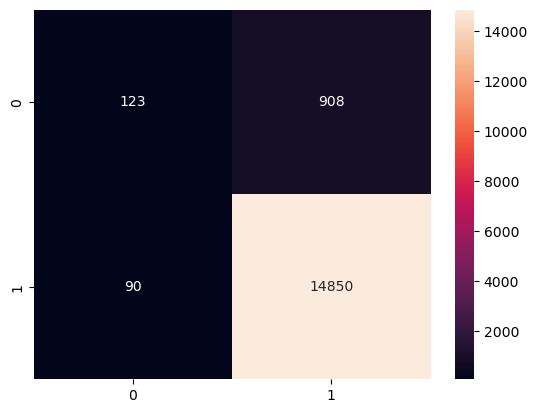

In [ ]:
conf_matrix = confusion_matrix(test_sm_labels, ANN_fraud_predictions)
sns.heatmap(conf_matrix, annot = True, fmt='g')


In [ ]:
def plotLearningCurve(history,epochs=20):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

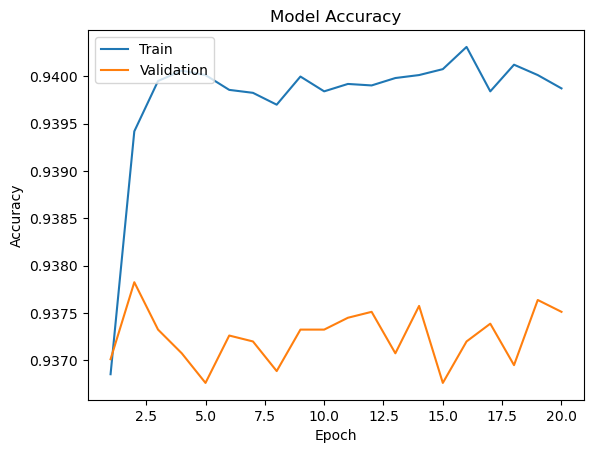

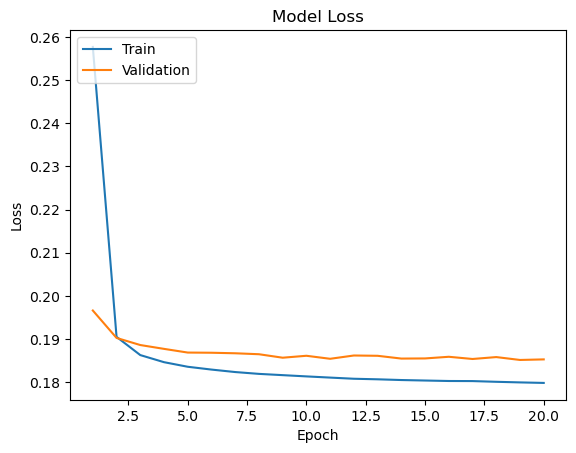

In [ ]:
plotLearningCurve(ANN_history)

In [ ]:
nm_score_df = pd.DataFrame(nm_Model_score).transpose()
# nm_score_df = nm_score_df.transpose()
nm_score_df

,base_score,accuary,acc_bal,av_precision,recall,f1,mcc
Logistic Regression,0.938,0.938,0.557,0.942,0.995,0.968,0.251
Support Vector Classifier,0.937,0.937,0.545,0.941,0.995,0.967,0.214
Decision Tree,0.936,0.936,0.551,0.942,0.993,0.967,0.216
KNearest,0.933,0.933,0.563,0.943,0.987,0.965,0.218
GaussianNB,0.905,0.905,0.686,0.958,0.938,0.949,0.325
LDA,0.934,0.934,0.616,0.950,0.981,0.965,0.314
Ridge,0.938,0.938,0.540,0.940,0.997,0.968,0.219
QDA,0.905,0.905,0.682,0.958,0.938,0.949,0.320
Bagging,0.929,0.929,0.586,0.946,0.979,0.963,0.241
MLP,0.937,0.937,0.560,0.943,0.993,0.967,0.243


In [ ]:
nm_score_df_re = nm_score_df.rename_axis(index='Models').rename_axis(columns='score')
nm_score_df_re

score,base_score,accuary,acc_bal,av_precision,recall,f1,mcc
Models,,,,,,,
Logistic Regression,0.938,0.938,0.557,0.942,0.995,0.968,0.251
Support Vector Classifier,0.937,0.937,0.545,0.941,0.995,0.967,0.214
Decision Tree,0.936,0.936,0.551,0.942,0.993,0.967,0.216
KNearest,0.933,0.933,0.563,0.943,0.987,0.965,0.218
GaussianNB,0.905,0.905,0.686,0.958,0.938,0.949,0.325
LDA,0.934,0.934,0.616,0.950,0.981,0.965,0.314
Ridge,0.938,0.938,0.540,0.940,0.997,0.968,0.219
QDA,0.905,0.905,0.682,0.958,0.938,0.949,0.320
Bagging,0.929,0.929,0.586,0.946,0.979,0.963,0.241


In [ ]:
nm_score_df_re['f1']

Models
Logistic Regression          0.968
Support Vector Classifier    0.967
Decision Tree                0.967
KNearest                     0.965
GaussianNB                   0.949
LDA                          0.965
Ridge                        0.968
QDA                          0.949
Bagging                      0.963
MLP                          0.967
LSVC                         0.968
BernoulliNB                  0.963
Passive_AC                   0.965
SGB                          0.968
Adaboost                     0.967
Extra_T                      0.967
R_forest                     0.968
XGB                          0.968
Name: f1, dtype: float64

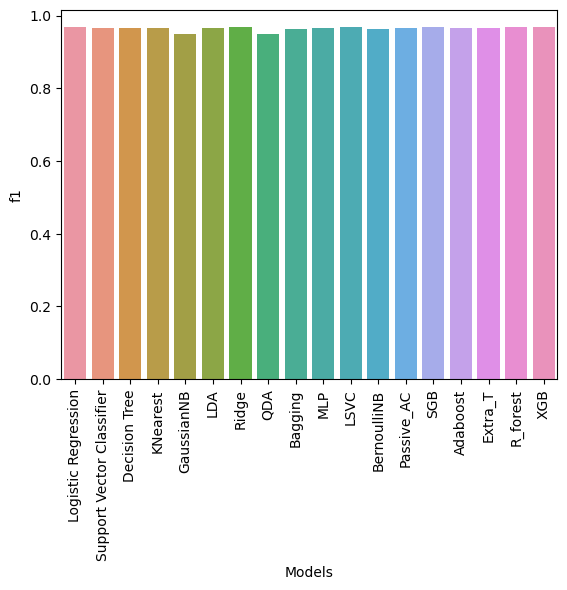

In [ ]:
import pandas as pd
import seaborn as sns


sns.barplot(x=nm_score_df_re.index,  y=nm_score_df_re.f1, data=nm_score_df_re)
plt.xticks(rotation=90)
plt.show()

In [ ]:
nm_f1_score_df = nm_score_df['f1']
nm_f1_score_df

Logistic Regression          0.968
Support Vector Classifier    0.967
Decision Tree                0.967
KNearest                     0.965
GaussianNB                   0.949
LDA                          0.965
Ridge                        0.968
QDA                          0.949
Bagging                      0.963
MLP                          0.967
LSVC                         0.968
BernoulliNB                  0.963
Passive_AC                   0.965
SGB                          0.968
Adaboost                     0.967
Extra_T                      0.967
R_forest                     0.968
XGB                          0.968
Name: f1, dtype: float64

In [ ]:
new_df = {"LGBM_f1_score" : LGBM_f1_score, 
          "cat_F1_score" : cat_F1_score,
          "stack_f1_score" : stack_f1_score,
          "ANN_f1" : ANN_f1
}
new_df = pd.Series(new_df)
new_df

LGBM_f1_score     0.966646
cat_F1_score      0.968045
stack_f1_score    0.967914
ANN_f1            0.967490
dtype: float64

In [ ]:
nm_f1_score_df = nm_f1_score_df.append(new_df)

/tmp/ipykernel_273230/3688184181.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
nm_f1_score_df.index.name = 'Models'
nm_f1_score_df = pd.DataFrame(nm_f1_score_df, columns=[ "f1_score"])
nm_f1_score_df

,f1_score
Models,
Logistic Regression,0.968000
Support Vector Classifier,0.967000
Decision Tree,0.967000
KNearest,0.965000
GaussianNB,0.949000
LDA,0.965000
Ridge,0.968000
QDA,0.949000
Bagging,0.963000


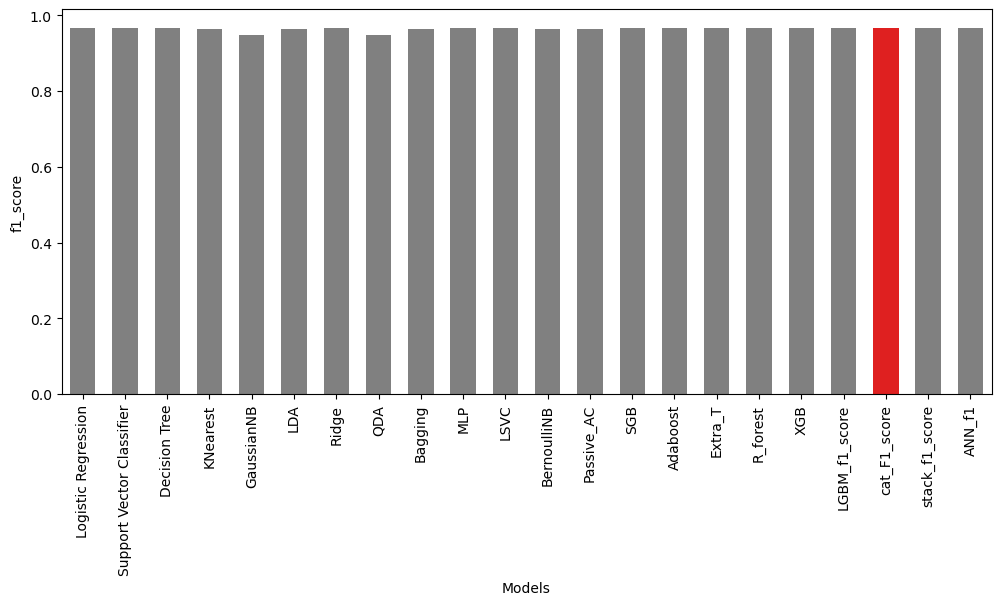

In [ ]:
import pandas as pd
import seaborn as sns
plt.figure(figsize=(12,5))
clrs = ['grey' if (x < max(nm_f1_score_df.f1_score)) else 'red' for x in nm_f1_score_df.f1_score]
ax = sns.barplot(x=nm_f1_score_df.index,  y=nm_f1_score_df.f1_score, data=nm_f1_score_df, palette=clrs, width=0.6)
plt.xticks(rotation=90)

    
plt.show()

In [ ]:
test_df = pd.read_csv("company_test.csv")

In [ ]:
test_df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [ ]:
test_df.dtypes

In [ ]:
# Fit and transform the 'color' column
encoded_sourcing_channel = encoder.fit_transform(test_df['residence_area_type'])

# Replace the 'color' column with the encoded values
test_df["residence_area_type"] = encoded_sourcing_channel

from sklearn.preprocessing import LabelEncoder


# Create the OneHotEncoder object
encoder = LabelEncoder()

# Fit and transform the 'color' column
encoded_sourcing_channel = encoder.fit_transform(test_df'sourcing_channel'])

# Replace the 'color' column with the encoded values
test_df["sourcing_channel"] = encoded_sourcing_channel

test_df

In [ ]:
testing_feature = test_df.drop('target', axis=1)
testing_label = test_df['target']

In [ ]:
testing_score = calculate_score(stacking_model, 
                                test_features=testing_feature, 
                                test_labels=testing_label)

In [ ]:
testing_predict = base_model.predict(testing_feature)